# Customer Churn Prediction using XGBoost

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

## Load the dataset

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

## Convert `TotalCharges` to numeric and handle errors

In [3]:
df["ToalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

## Fill any `NaN` values that might have been introduced during the conversion

In [4]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)

## Define the features

In [5]:
X = df.drop("Churn", axis = 1)

## Define the target variable

In [6]:
y = df["Churn"]

## Converting the categorical variables into numerical values

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

## Convert categorical variable into dummy/indicator variables

In [8]:
X_encoded = pd.get_dummies(X)

## Splitting the dataset into the Training set and Test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## Train the model

In [10]:
model = XGBClassifier(use_label_encoder = False)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Make predictions

In [11]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 1]


## Model Evaluation

In [12]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[912 124]
 [178 195]]
0.7856635911994322


## Visualizing the Confusion Matrix

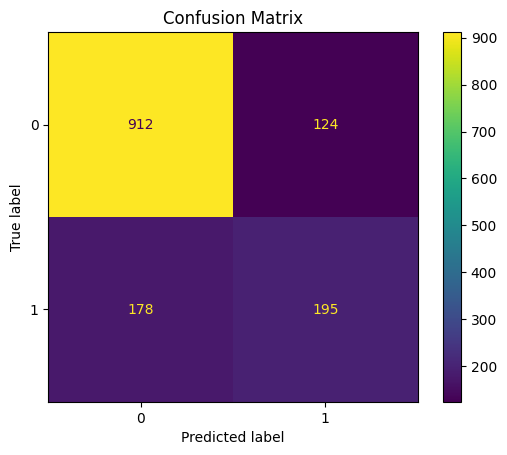

In [13]:
cmd = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
cmd.plot()
plt.title("Confusion Matrix")
plt.show()

## Save the Actual and Predicted values dataset into a CSV File

In [14]:
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions.to_csv("predictions.csv", index = False)

<hr>